In [1]:
import sympy as sp
from sympy.abc import x, y
from IPython.display import display

import warnings
warnings.simplefilter("ignore")

# Задание 1

In [2]:
def plot_and_zeros(f, plot_f=sp.plotting.plot3d):
  display(f)
  plot_f(f)
  display(["zeros:", sp.solve(f)])

## a)

In [3]:
f1 = x*(y - 5)**2
f1

x*(y - 5)**2

(y - 5)**2

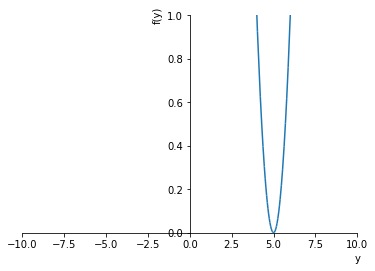

['zeros:', [5]]

In [4]:
plot_and_zeros(sp.diff(f1, x), sp.plotting.plot)

x*(2*y - 10)

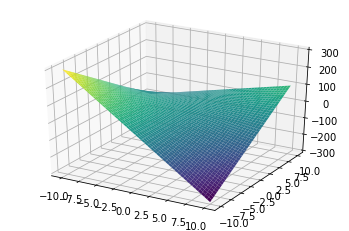

['zeros:', [{x: 0}, {y: 5}]]

In [5]:
 plot_and_zeros(sp.diff(f1, y))

## b)

In [6]:
f2 = (y - sp.E/20)**2 * sp.sin(sp.pi * x)
f2

(y - E/20)**2*sin(pi*x)

pi*(y - E/20)**2*cos(pi*x)

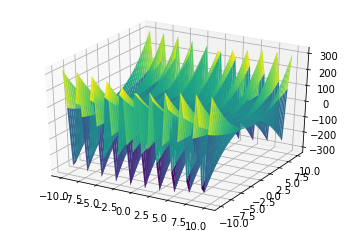

['zeros:', [{x: 1/2}, {x: 3/2}, {y: E/20}]]

In [7]:
plot_and_zeros(sp.diff(f2, x))

(2*y - E/10)*sin(pi*x)

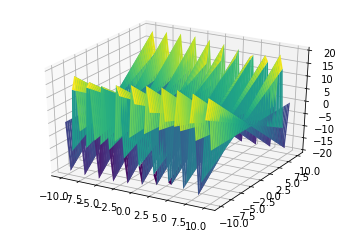

['zeros:', [{x: 0}, {x: 1}, {y: E/20}]]

In [8]:
plot_and_zeros(sp.diff(f2, y))

## c)

In [9]:
f3 = x*sp.sin(x)*sp.sin(y - 2)
f3

x*sin(x)*sin(y - 2)

x*sin(y - 2)*cos(x) + sin(x)*sin(y - 2)

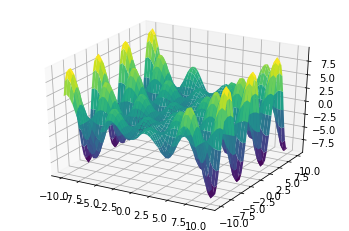

['zeros:', [{y: 2}, {y: 2 + pi}]]

In [10]:
plot_and_zeros(sp.diff(f3, x))

x*sin(x)*cos(y - 2)

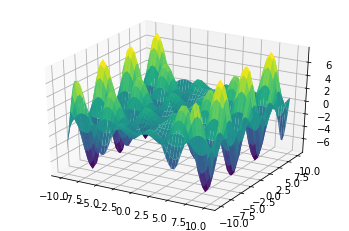

['zeros:', [{x: 0}, {x: pi}, {y: 2 + 3*pi/2}, {y: pi/2 + 2}]]

In [11]:
plot_and_zeros(sp.diff(f3, y))

# Задание 2

In [12]:
observations = [
  [1945, 560, 4.3],
  [1495, 340, 4.9],
  [1570, 343, 5.2]
]
X = [1520, 431]

In [13]:
a = sp.symbols("a:2")
a

(a0, a1)

In [14]:
terms = [(x[0] * a[0] + x[1] * a[1] - x[2])**2 for x in observations]
terms

[(1945*a0 + 560*a1 - 4.3)**2,
 (1495*a0 + 340*a1 - 4.9)**2,
 (1570*a0 + 343*a1 - 5.2)**2]

In [15]:
from functools import reduce
mse = reduce(
    lambda f, term: f + term,
    terms
) / len(terms)
mse

(1495*a0 + 340*a1 - 4.9)**2/3 + (1570*a0 + 343*a1 - 5.2)**2/3 + (1945*a0 + 560*a1 - 4.3)**2/3

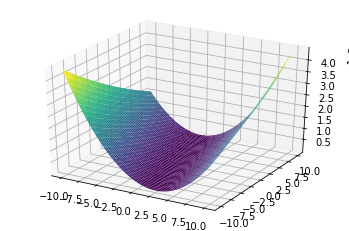

In [16]:
sp.plotting.plot3d(mse);

In [17]:
d_mse = [sp.diff(mse, a[i]) for i in range(len(a))]
d_mse

[5655300*a0 + 4272020*a1/3 - 15902.0,
 4272020*a0/3 + 364566*a1 - 3905.06666666667]

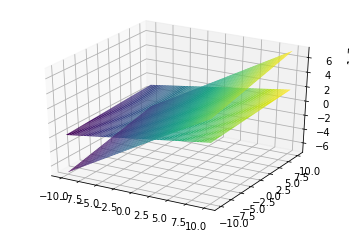

In [18]:
sp.plotting.plot3d(*d_mse);

In [19]:
sln = sp.linsolve(d_mse, a)
sln

{(0.00696881617189364, -0.0165088736220173)}

In [20]:
sln = next(iter(sln))
sln

(0.00696881617189364, -0.0165088736220173)

In [21]:
[d_mse[i].subs(dict(zip(a, sln))) for i in range(len(sln))]

[-3.63797880709171e-12, 0]

Поскольку $mse > 0 \space\forall a = (a_1, a_2)$, то нули производной — либо миним $f$ либо точка перегиба; но, судя по форме (и графикам) произодных, они (производные) в нуле меняют знак, значит, в нулях производных $f$ достигает минимума.


Проверим полученную функцию на известных данных.

In [22]:
X_ = sp.Matrix([observations[i][:-1] for i in range(len(observations))])
X_

Matrix([
[1945, 560],
[1495, 340],
[1570, 343]])

In [23]:
Y = sp.Matrix([observations[i][-1] for i in range(len(observations))])
Y

Matrix([
[4.3],
[4.9],
[5.2]])

In [24]:
A = sp.Matrix(sln)
A

Matrix([
[0.00696881617189364],
[-0.0165088736220173]])

In [25]:
D = X_ * A - Y
D

Matrix([
[0.00937822600344607],
[-0.0946368545048868],
[ 0.0784977375210829]])

In [26]:
MSE = sum([i**2 / len(D) for i in D])
MSE

0.00506866004982655

In [28]:
mse.subs(zip(a, sln))

0.00506866004982654

In [27]:
time_predicted = (sp.Matrix(sln).T * sp.Matrix(X))[0]
time_predicted

3.47727605018888